# New Ranks, Happier Patients

The orthopedic devices made by our company are used around the world to improve people's lives. However, there are numerous complaints that have come from our product, and the current ranking system in place for our doctors tends to reward geography and the number of purchases. In order to improve customer service and patient outcomes, a new ranking system should be implemented.

In [1]:
suppressPackageStartupMessages(library(tidyverse))
doctors <- readr::read_csv('data/doctors.csv', show_col_types = FALSE)
orders <- readr::read_csv('data/orders.csv', show_col_types = FALSE)
complaints <- readr::read_csv('data/complaints.csv', show_col_types = FALSE)
instructions <- readr::read_csv('data/instructions.csv', show_col_types = FALSE)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
install.packages(c("dplyr","ggplot2"))
library(dplyr)
library(ggplot2)

Installing dplyr [1.0.9] ...
	OK [linked cache]
Installing ggplot2 [3.3.6] ...
	OK [linked cache]


## Analysis by Region

In the past, our company has segmented customers based on region. Our data shows the following:

In [3]:
### Count doctors per region
byregion <- doctors %>%
    count(Region)
### Rename "n" to "Doctors"
names(byregion)[names(byregion) == "n"] <- "Doctors"
### Sum total purchases per region
payregion <- doctors %>%
  group_by(Region) %>%
  summarise(Total = sum(Purchases))
### Merge the two frames
regiondata <- merge(x=byregion,y=payregion,by="Region") 
### Add a spending per doctor calculation
regiondata$Avg_Per_Doctor = (regiondata$Total / regiondata$Doctors)

In [4]:
### Filter the data to count doctors by region, descending
docbyreg <- regiondata[order(regiondata$Doctors, decreasing = TRUE),]  
### Set colors roughly equal to quartiles
colors <- c(rep("red",11), rep("orange", 24), rep("gray",11))
### Plot the data
bardoc <- ggplot(docbyreg, aes(x = reorder(Region, -Doctors), y = Doctors)) +
    geom_bar(stat = "identity", fill = colors, alpha = .7) +
    theme(axis.text.x = element_text(angle = 90), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    labs(x = "Region", title = "Graph 1: Number of Doctors by Region")

In [5]:
### Filter the data to represent total spent by region, descending
totbyreg <- regiondata[order(regiondata$Total, decreasing = TRUE),]  
### Set colors roughly equal to quartiles 
colors <- c(rep("red",11), rep("orange", 24), rep("gray",11))
### Plot the data
bartot <- ggplot(totbyreg, aes(x = reorder(Region, -Total), y = Total)) +
    geom_bar(stat = "identity", fill = colors, alpha = .7) +
    theme(axis.text.x = element_text(angle = 90), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    labs(y = "Total Purchases", x = "Region", title = "Graph 2: Total Purchases by Region")

In [6]:
### Filter the data to represent total spent by region, descending
avgbyreg <- regiondata[order(regiondata$Avg_Per_Doctor, decreasing = TRUE),]  
### Set colors roughly equal to quartiles 
colors <- c(rep("red",11), rep("orange", 24), rep("gray",11))
### Plot the data
baravg <- ggplot(avgbyreg, aes(x = reorder(Region, -Avg_Per_Doctor), y = Avg_Per_Doctor)) +
    geom_bar(stat = "identity", fill = colors, alpha = .7) +
    theme(axis.text.x = element_text(angle = 90), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    labs(y = "Average Number of Purchases", x = "Region", title = "Graph 3: Average Purchases per Doctor, by Region")

[1] "Summary Statistics for Doctors by Region: "


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     4.0     6.0     9.5    12.5    34.0 

[1] "The top 5 regions, by number of doctors: "


[1] "1 13" "1 14" "1 9"  "1 19" "1 11"

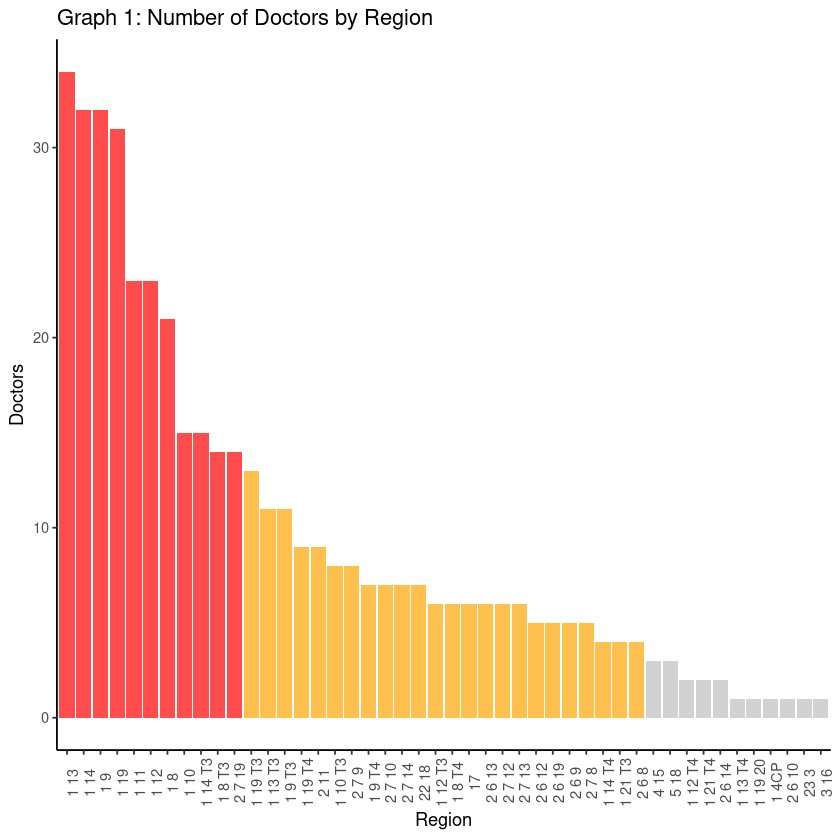

[1] "Summary Statistics for Total Purchases by Region: "


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   25.25   48.50  102.52  149.75  389.00 

[1] "The top 5 regions, by number of purchases:"


[1] "1 14" "1 13" "1 9"  "1 12" "1 19"

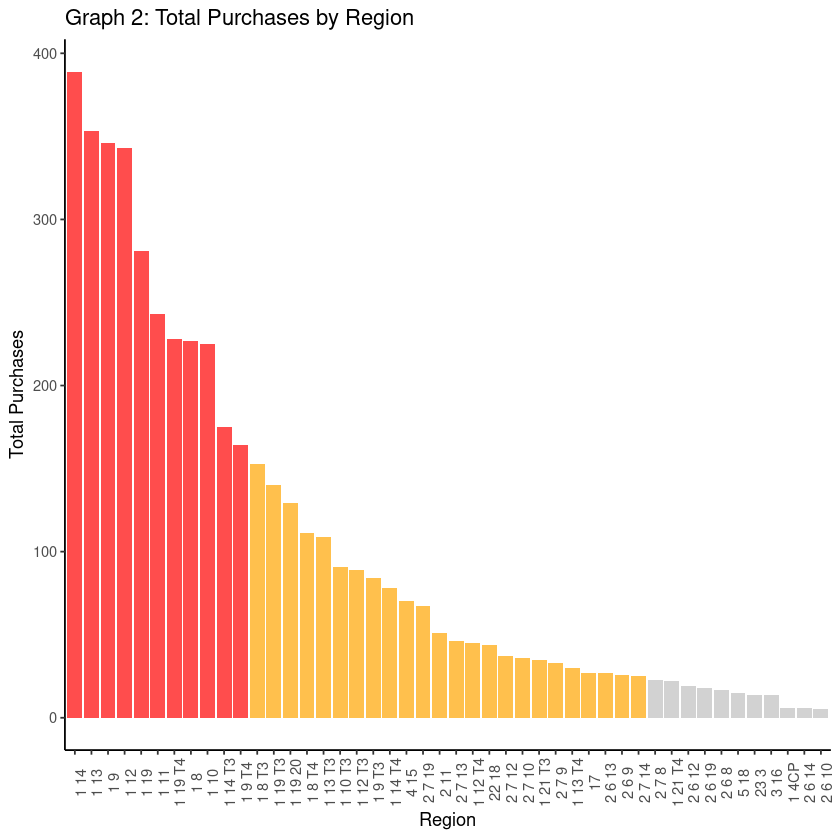

[1] "Summary Statistics for Purchases per Doctor, by Region: "


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.036  10.146  13.109  14.000 129.000 

[1] "The top 5 regions, by number of purchases per doctor: "


[1] "1 19 20" "1 13 T4" "1 19 T4" "1 9 T4"  "4 15"

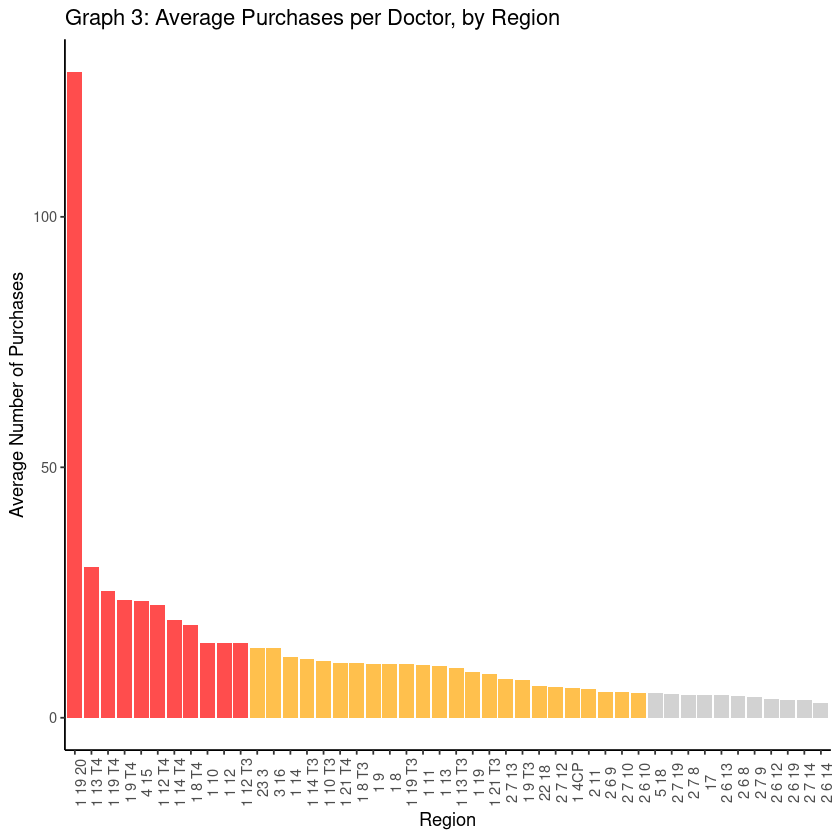

In [7]:
### Plot all 3 with summary statistics
bardoc
print(paste("Summary Statistics for Doctors by Region: "))
summary(regiondata$Doctors)
print(paste("The top 5 regions, by number of doctors: "))
head(docbyreg$Region, 5)
bartot
print(paste("Summary Statistics for Total Purchases by Region: "))
summary(regiondata$Total)
print(paste("The top 5 regions, by number of purchases:" ))
head(totbyreg$Region, 5)
baravg
print(paste("Summary Statistics for Purchases per Doctor, by Region: ")) 
summary(regiondata$Avg_Per_Doctor)
print(paste("The top 5 regions, by number of purchases per doctor: ")) 
head(avgbyreg$Region, 5)

### Doctors Per Region

As shown in graph 1 and the relevant summary statistics, the top 25% of regions have between 12.5 and 34 doctors, the middle 50% have between 4 and 12.5 doctors, and the lowest 25% have between 1 and 4 doctors. The top 5 regions, by number of doctors, are: 1 13, 1 14, 1 9, 1 19, and 1 11.

### Purchases Per Region

The relevant summary statistics and graph 2 show the distribution of total purchases by region, with the top 25% being between 149.75 and 389 purchases, the middle 50% being between 25.25 and 149.75 purchases, and the lowest 25% being between 5 and 25.25 purchases. The top 5 regions, by number of purchases, are: 1 14, 1 13, 1 9, 1 12, and 1 19.

### Purchases Per Doctor, by Region

Graph 3, and the associated summary statistics, show the average purchases per doctor, by region. The lowest 25% of regions average between 3 and 5 purchases per doctor, the middle 50% average between 5 and 14 purchases per doctor, and the highest 25% of regions average between 14 and 129 purchases per doctor. The top 5 regions associated with this are: 1 19 20, 1 13 T4, 1 19 T4, 1 9 T4, and 4 15.

### Insights

Regions 1 13, 1 14, 1 9, and 1 19 all appear in the top 5 regions for number of doctors and number of purchases. Logically, this makes sense: the more doctors a region has, the more of a product they will purchase, driving up total purchases. All of these regions, as well as 1 11 (the region with the fifth highest amount of doctors), fall within the IQR / middle 50% of purchases per doctor. 

Region 1 19 20, with the highest number of purchases per doctor, has 129 purchases by one single doctor. 

## Purchases vs. Complaints

However, the number of purchases per region do not tell us much about patient outcome. Here, we will look purchases versus complaints, with complaints serving as a proxy for success.

In [8]:
comporder <- complaints[,c(1,3)] %>%
    merge(doctors[,c(1, 3, 4, 8, 9)], by = "DoctorID") %>%
    group_by(DoctorID) %>%
    summarise(Complaints = sum(Qty), Purchases = sum(Purchases), Rank = Rank,
              Category = Category, Experience = Experience)%>%
    mutate(Complaints_Per_Purchase = Complaints/Purchases) 
comporder$Category = ifelse(comporder$Category == "Specialist", 0, 1)

`summarise()` has grouped output by 'DoctorID'. You can override using the
`.groups` argument.


,Complaints,Purchases,Category,Experience,Complaints_Per_Purchase
Complaints,1.00000000,0.1969279,-0.20737604,0.02299114,0.49533099
Purchases,0.19692788,1.0000000,-0.15121177,0.20618115,-0.37926931
Category,-0.20737604,-0.1512118,1.00000000,0.10932208,-0.01984189
Experience,0.02299114,0.2061812,0.10932208,1.00000000,0.05318400
Complaints_Per_Purchase,0.49533099,-0.3792693,-0.01984189,0.05318400,1.00000000


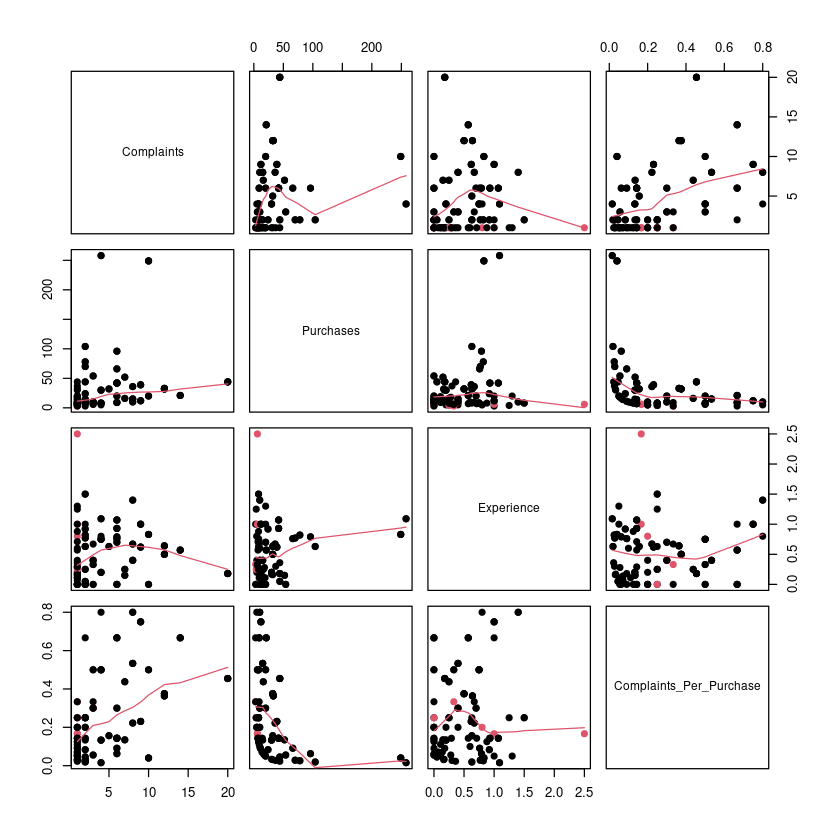

In [9]:
### Correlation pairs, graphed. Black = Specialist, Red = General Practitioner
pairs(comporder[,c(2,3,6,7)], pch = 19, panel=panel.smooth, col=(comporder$Category + 1))
cor(comporder[,c(2,3,5:7)])

### Insights

In general, there is a weak correlation between purchases and complaints; it would make sense that, the more purchases made (and medication administered), the higher likelihood of complaints being made. Interestingly, however, is the negative relationship between purchases and average complaints per purchase; this implies that, the more purchases made, the fewer complaints filed. It appears that there are outliers in the data, in that those with relatively few purchases tend to have a high level of complaints, whereas those with larger quantities purchased have lower levels of complaints. 

A possible explanation of this insight is that doctors who purchase more of the product tend to have a better understanding of the use and the general effects of the product, whereas those who are less experienced (as measured by number of purchases) are less familiar with it, causing more issues (as measured by complaints). If this holds true, providing information and training in the product to these doctors should lead to a better patient outcome. 

An interesting counterpoint for this hypothesis comes from the negative correlation between the type of doctor and complaints (and purchases). If a doctor is a General Practitioner, rather than a Specialist, there is a weak (but present) negative correlation with the number of complaints (as well as purchases), meaning that a General Practitioner, although less specialized than a Specialist, is more likely to use this product in a manner which improves patient outcomes (as measured by the number of complaints associated with it), by selecting this product when it is more relevant to the patient. The correlation table also shows (weakly) that those who have a better relationship with the company make more purchases. 

In [10]:
comprank <- complaints[,c(1,3)] %>%
            merge(doctors[,c(1, 4, 8, 9)], by = "DoctorID") %>%
            group_by(Rank) %>%
            ### Sum complaints and purchases by rank, average complaints per doctor by rank
            summarise(Complaints = sum(Qty), Purchases = sum(Purchases), Avg = mean(Qty),
                      Experience = mean(Experience)) %>%
            ### Average number of complaints per purchase
            mutate(Complaints_Per_Purchase = Complaints / Purchases)
comprank

Rank,Complaints,Purchases,Avg,Experience,Complaints_Per_Purchase
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ambassador,85,1419,1.888889,0.6244444,0.05990134
Gold,8,18,1.600000,0.1600000,0.44444444
Gold Plus,12,26,2.000000,0.8666667,0.46153846
Platinum,47,115,2.611111,0.6055556,0.40869565
Platinum Plus,38,128,2.375000,0.5293750,0.29687500
Silver Plus,7,35,1.166667,0.1950000,0.20000000
Titanium,69,325,2.379310,0.4117241,0.21230769


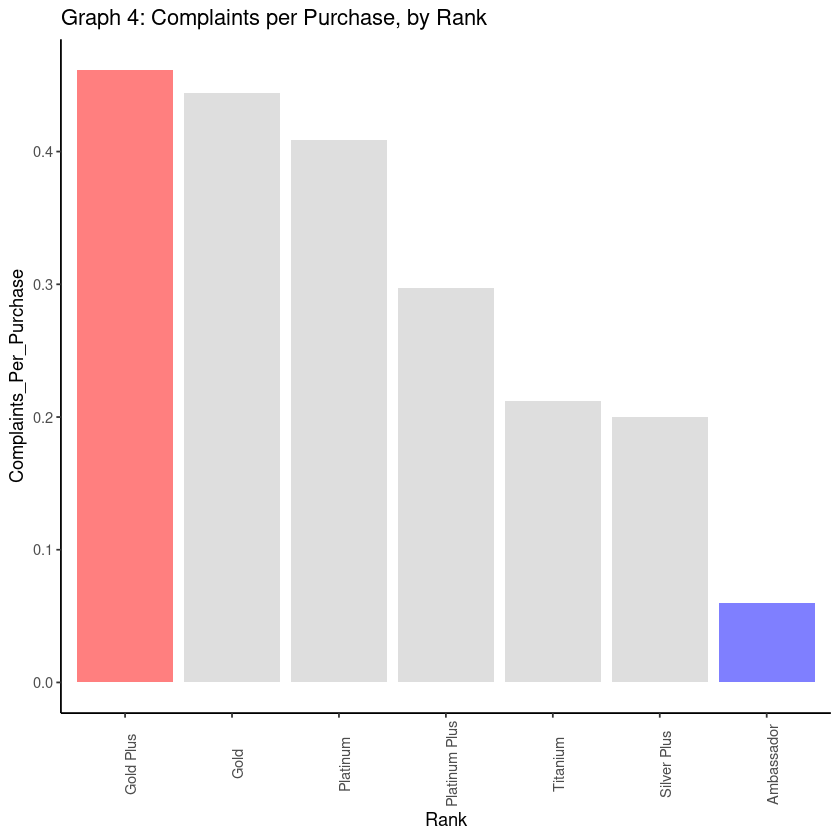

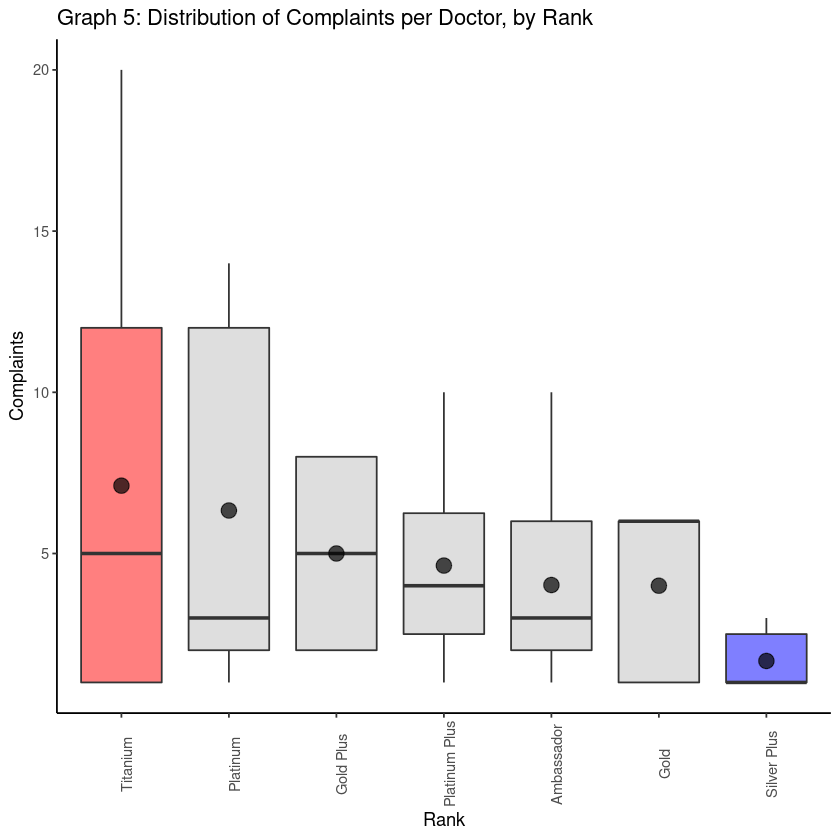

In [11]:
colors <- c(rep("red",1), rep("gray", 5), rep("blue",1))
compperdesc <- comprank[order(comprank$Complaints_Per_Purchase, decreasing = TRUE),]
compboxdesc <- comporder[order(comporder$Complaints, decreasing = TRUE),]
### Graph average complaints per purchase, based on rank of purchaser
ggplot(compperdesc, aes(x = reorder(Rank, -Complaints_Per_Purchase), y = Complaints_Per_Purchase)) +
    geom_bar(stat = "identity", fill = colors, alpha = .5) +
    theme(axis.text.x = element_text(angle = 90), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    labs(x = "Rank", title = "Graph 4: Complaints per Purchase, by Rank")
### Graph distribution of complaints per rank
boxcomplaints <- ggplot(compboxdesc, aes(x= reorder(Rank, -Complaints), y=Complaints)) + 
    geom_boxplot(fill=colors, alpha=.5) +
    theme(axis.text.x = element_text(angle = 90), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    stat_summary(fun=mean, geom="point", size=4, alpha = .7) +
    labs(x = "Rank", title = "Graph 5: Distribution of Complaints per Doctor, by Rank")
boxcomplaints

### Further Insights

To reiterate doctor rankings: The highest level is Ambassador, followed by Titanium Plus, Titanium, Platinum Plus, Platinum, Gold Plus, Gold, Silver Plus, and finally Silver (the lowest level).

As shown in Graph 4, higher ranks do not always coincide with fewer complaints. The lowest number of complaints per purchase, or average complaints based on usage, belongs to the ambassador level, the highest ranking that a doctor can be given. Titanium, the third highest ranking (the dataset lacks any Titanium Plus ranked doctors with noted complaints), occupies the third lowest complaint rate, while Gold Plus, the middle ranking, has the highest number of average complaints. Interestingly, Silver Plus, the second lowest ranking, averages the second lowest number of average complaints.

Graph 5 helps to expand on the information in Graph 4. Silver Plus has the lowest number of complaints per doctor, whereas Titanium has the highest number of complaints per doctor. The range of complaints leads to this disconnect; Platinum rank doctors, for instance, have a median that is nearly equal to Ambassador rank doctors, with 50% of doctors in either group having about 2.5 complaints or less; however, there is at least one Platinum doctor with nearly 15 complaints, which drives the average number of complaints up significantly.

The number of complaints is directly tied to customer service - that is, each complaint is a failure to adequately serve a customer. The goal of the ranking system should be to endorse doctors who are doing particularly well in understanding and effectively administering this treatment, rather than rewarding a doctor for purchasing large quantities of this product without significantly improving patient outcomes. 

## Other Segments

Aside from purchases and complaints, whether or not instructions were given, and the type of doctor making the purchase, are important in understanding where complaints come from. In the current ranking system, purchases are highly related to rank, as seen below (graph 6).


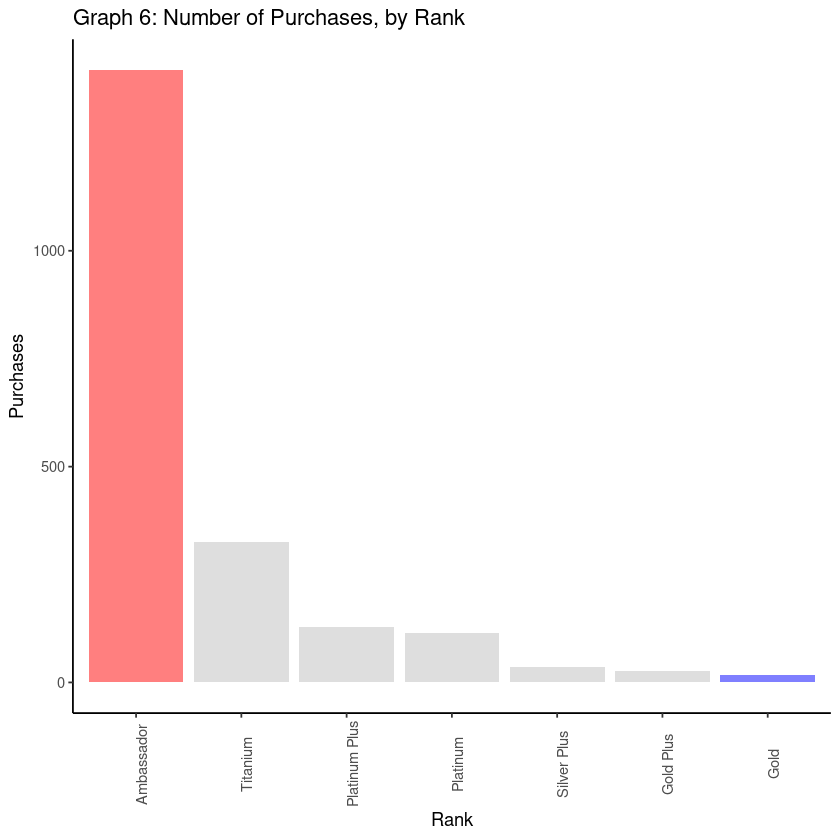

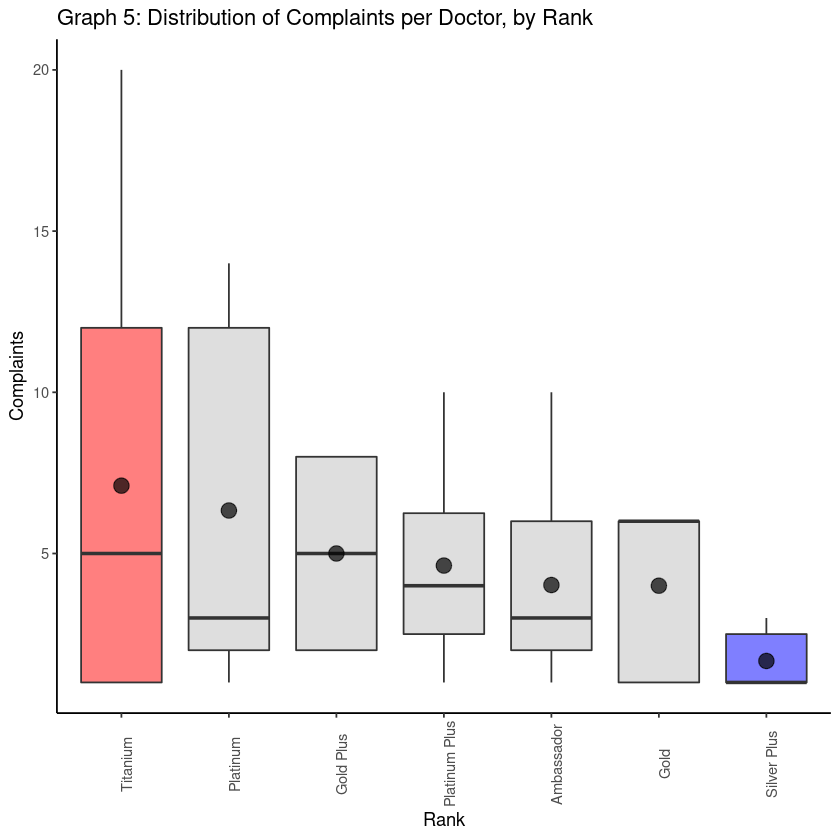

In [12]:
purchasedesc <- comprank[order(comprank$Purchases, decreasing = TRUE),]
### Graph purchases per rank
purchasedescbar <- ggplot(purchasedesc, aes(x = reorder(Rank, -Purchases), y = Purchases)) +
    geom_bar(stat = "identity", fill = colors, alpha = .5) +
    theme(axis.text.x = element_text(angle = 90), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    labs(x = "Rank", title = "Graph 6: Number of Purchases, by Rank")
### Compare ranks based on purchases vs. ranks based on complaints
purchasedescbar
boxcomplaints

Comparing ranks based on number of purchases versus ranks based on number of complaints, it is clear that the reward of a higher, more preferred rank is based on the number of purchases, rather than the outcome of a patient. 

How can we improve this?

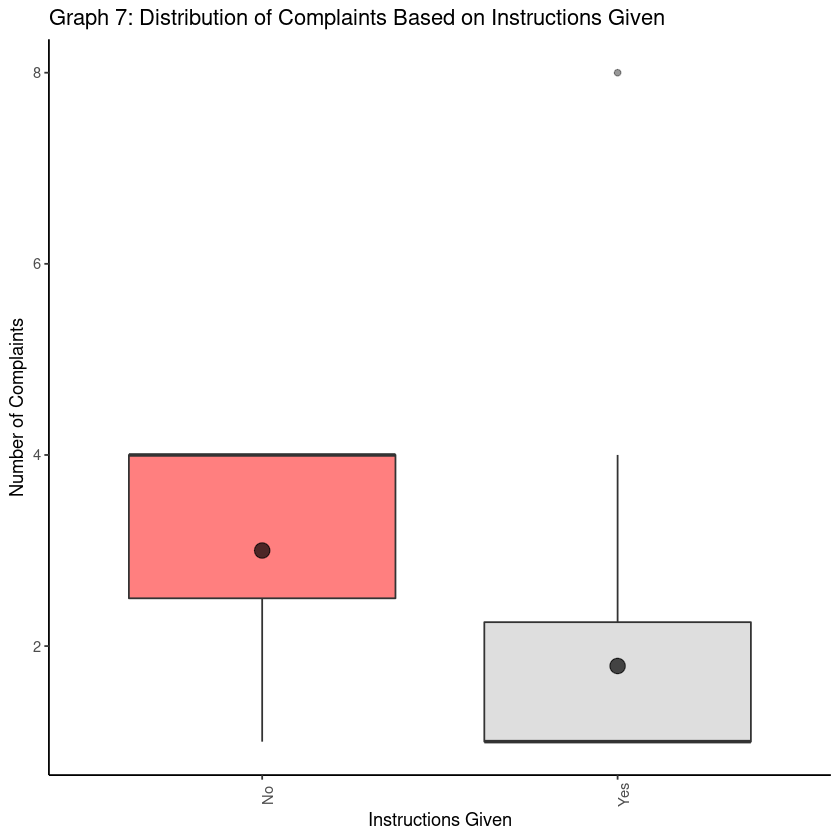

In [13]:
compinst <- complaints[,c(1,3)] %>%
            merge(doctors[,c(1, 4, 9)], by = "DoctorID") %>%
            merge(instructions, by = "DoctorID")

ggplot(compinst, aes(x=Instructions, y = Qty)) +
    geom_boxplot(fill=c("red", "gray"), alpha=.5) +
    theme(axis.text.x = element_text(angle = 90), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    stat_summary(fun=mean, geom="point", size=4, alpha = .7) +
    labs(x = "Instructions Given", y = "Number of Complaints",
         title = "Graph 7: Distribution of Complaints Based on Instructions Given")

Making sure that the doctors have a good understanding of the medical device, and that they communicate relevant information with their patients, especially in given instructions, is one way to improve patient outcome. As seen in Graph 7 above, doctors who give instructions have fewer complaints on average than those who do not give instructions.

In [14]:
head(doctors)

DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
AHDCBA,4 15,Specialist,Ambassador,49,0.90,53.85,1.20,49
ABHAHF,1 8 T4,General Practitioner,Ambassador,37,0.00,100.00,0.00,38
FDHFJ,1 9 T4,Specialist,Ambassador,33,1.53,--,0.00,34
BJJHCA,1 10 T3,Specialist,Ambassador,28,2.03,--,0.48,29
FJBEA,1 14 T4,Specialist,Ambassador,23,0.96,76.79,0.75,24
BCJCED,1 10,Specialist,Platinum Plus,19,1.20,-50.00,0.10,20


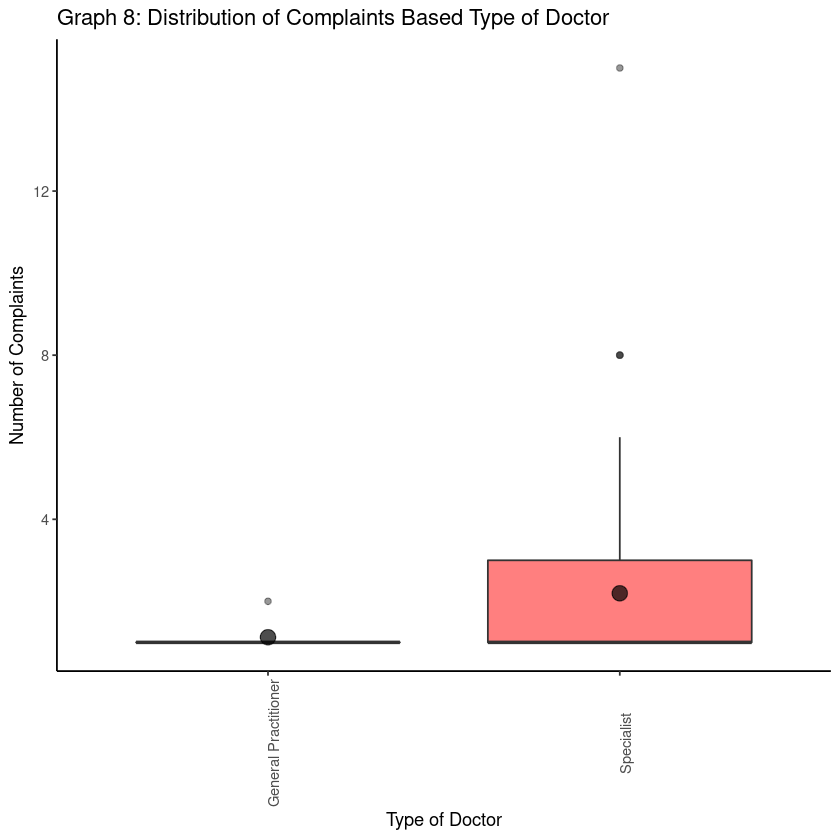

In [15]:
compcate <- complaints[,c(1,3)] %>%
            merge(doctors[,c(1, 3, 4)], by = "DoctorID")# %>%
            #merge(instructions, by = "DoctorID")

ggplot(compcate, aes(x=Category, y = Qty)) +
    geom_boxplot(fill=c("gray", "red"), alpha=.5) +
    theme(axis.text.x = element_text(angle = 90), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    stat_summary(fun=mean, geom="point", size=4, alpha = .7) +
    labs(x = "Type of Doctor", y = "Number of Complaints",
         title = "Graph 8: Distribution of Complaints Based Type of Doctor")

Graph 8 also shows us that the category of a doctor, being either a specialist or a general practitioner, correlates with the average number of complaints received. This could be due to how many more patients a specialist sees, or that a general practitioner is more careful in selecting who receives this product. It is possible that a general practitioner only uses this product in an emergency situation, whereas a specialist uses it in less severe cases, which might increase the number of complaints. 

## Why Complaints Matter

There are several reasons why complaints should be weighed heavily in ranking and endorsing specific doctors.

First, word of mouth is still incredibly important, in terms of marketing and sales. If patients are apprehensive in choosing this device or valuing the endorsement a rank gives a specific doctor, due to the amount of complaints associated with the device or doctor, our brand is damaged and our ranks are meaningless.

Second, if we continue to endorse doctors who have a high number of complaints, we are much more likely to see lawsuits. If a doctor is continually receiving complaints, they may not be using our product as intended, and by continually supporting them and prioritizing them, we may be seen as partially responsible.

Finally, and most importantly, our device was made to improve patient's lives. If there are complaints, and there is a possibility for us to address the underlying reasons for the complaints, it should be a priority. This is the ethical thing for us to do. 

## Recommendations

Based on the findings, a new segmentation of rank should be implemented, based on patient outcome, rather than predominantly on products purchased. Ultimately, the number of complaints and their relation to purchases should be the metrics for a new ranking system.

The new ranking system being proposed gets rid of "Plus" ranks, reducing the total number of ranks to five: Ambassador, Titanium, Platinum, Gold, and Silver. The new metrics, based on rank from Silver to Ambassador, are as follows:
    
    - Silver: Default rank. 
    
    - Gold: Minimum 5 purchases, no more than .4 complaints per purchase.
    
    - Platinum: Minimum 10 purchases, no more than .3 complaints per purchase.
    
    - Titanium: Minimum 15 purchases, no more than .2 complaints per purchase.
    
    - Ambassador: Minimum 20 purchases, no more than .1 complaints per purchase. 

For the most part, those already ranked as an Ambassador have earned their rank, averaging 6 complaints per 100 purchases. Titanium, which currently has a large number of complaints, would see a reduction in its size, as would Platinum.

There is still an incentive to purchase more items, and with each purchase (and following use of the device), there is a chance for a doctor to become more familiar, more confident, and more competent in properly using our device. The purchase to complaint ratio, however, exists as a metric to determine how well each doctor is performing, essentially working as a grading system: more purchases and procedures should increase experience, but if there are continual complaints about the doctor's work, it is obvious that they are failing the patient in some way (either in improper usage, lack of communication, or something else).

As seen in graphs 7 and 8, there are fewer complaints associated with cases in which instructions were given, as well as by General Practitioners, who may be more careful in suggesting our product and more attentive to its use. This implies that, in order to progress in ranks, a doctor will need to make sure our product is the optimal choice for a patient, give instructions and explain the benefits and costs of its use, and be more attentive in surgery and post-op. 

By changing the rankings, we can expect an improvement in customer service and patient outcomes, which will solidify our product as safe, effective, and a good choice for those who need it. 